## Importação de Bibliotecas

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Aquisição de dados

 Baixe o dataset do Kaggle: https://www.kaggle.com/datasets/aakashverma8900/portuguese-bank-marketing. Leia a documentação disponível no link para conhecer melhor o dataset.

In [ ]:
# ### Pelo Github
# ! wget --no-check-certificate --content-disposition 'https://raw.githubusercontent.com/RatonesR/pos_graduacao_maua/refs/heads/main/analise_estatistica_dados/atividade_1/Bank%20Marketing.csv'
# df_git = pd.read_csv('Bank Marketing.csv', sep=',')

In [ ]:
# Pelo Kaggle
path = kagglehub.dataset_download("aakashverma8900/portuguese-bank-marketing")
arquivo = "Bank Marketing.csv"


Using Colab cache for faster access to the 'portuguese-bank-marketing' dataset.


## Importação

Leia no seu programa os dados com a biblioteca pandas. Exiba o tamanho do dataset, em termos de linhas e colunas.

In [ ]:
df = pd.read_csv(os.path.join(path, arquivo))

In [ ]:
df.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [ ]:
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset tem 45211 linhas e 17 colunas.


## Tratamento de dados

1. Selecione as seguintes colunas para trabalhar: 'Age', 'Job', 'Marital Status', 'Education', 'Balance (euros)', 'Personal Loan',  'Previous', 'Subscription'.

In [ ]:
df_teste = df[['Age', 'Job', 'Marital Status', 'Education', 'Balance (euros)', 'Personal Loan', 'Previous', 'Subscription']].copy()
df_teste.head()

,Age,Job,Marital Status,Education,Balance (euros),Personal Loan,Previous,Subscription
0,58,management,married,tertiary,2143,no,0,1
1,44,technician,single,secondary,29,no,0,1
2,33,entrepreneur,married,secondary,2,yes,0,1
3,47,blue-collar,married,unknown,1506,no,0,1
4,33,unknown,single,unknown,1,no,0,1


2. Renomeie as colunas, de forma a acessá-las mais facilmente

In [ ]:
for nome_coluna in df_teste.columns:
    nome_limpo = str(nome_coluna).lower().strip().replace(' ', '_')
    nome_limpo = nome_limpo.replace('(', '')
    nome_limpo = nome_limpo.replace(')', '')
    df_teste.rename(columns={nome_coluna: nome_limpo}, inplace=True)

df_teste.head()

,age,job,marital_status,education,balance_euros,personal_loan,previous,subscription
0,58,management,married,tertiary,2143,no,0,1
1,44,technician,single,secondary,29,no,0,1
2,33,entrepreneur,married,secondary,2,yes,0,1
3,47,blue-collar,married,unknown,1506,no,0,1
4,33,unknown,single,unknown,1,no,0,1


In [ ]:
# ### SUBSTITUI O DATAFRAME ORIGINAL
# lista_colunas = ['Age', 'Job', 'Marital Status', 'Education', 'Balance (euros)', 'Personal Loan', 'Previous', 'Subscription']
# for nome_coluna in lista_colunas:
#     nome_limpo = str(nome_coluna).lower().strip().replace(' ', '_')
#     nome_limpo = nome_limpo.replace('(', '')
#     nome_limpo = nome_limpo.replace(')', '')
#     df.rename(columns={nome_coluna: nome_limpo}, inplace=True)

# df.head()

3. Verifique se há valores faltantes.

In [ ]:
df_teste.isnull().sum()

,0
age,0
job,0
marital_status,0
education,0
balance_euros,0
personal_loan,0
previous,0
subscription,0


4. Exiba os valores possíveis de cada variável (value_counts)

In [ ]:
for coluna in df_teste.columns:
    print("=====================================")
    print(df_teste[coluna].value_counts())
    print("_____________________________________")

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64
_____________________________________
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
_____________________________________
marital_status
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
_____________________________________
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
_____________________________________
balance_euros
0        3514
1         195
2         156
4         139
3         134
         ... 
14204       1
8205        1
9710        1
7038        1
4416        1
Name: count, Len

5. Identifique o tipo de cada variável: quantitativa (discreta, contínua) ou qualitativa (ordinal, nominal). Se for uma variável nominal, veja se é binária ou múltipla.

In [ ]:
df_teste.dtypes

,0
age,int64
job,object
marital_status,object
education,object
balance_euros,int64
personal_loan,object
previous,int64
subscription,int64


In [ ]:
classificacao_final = {
    'age': 'Quantitativa - Discreta',
    'job': 'Qualitativa - Nominal (Múltipla)',
    'marital_status': 'Qualitativa - Nominal (Múltipla)',
    'education': 'Qualitativa - Ordinal',
    'balance_euros': 'Quantitativa - Contínua',
    'personal_loan': 'Qualitativa - Nominal (Binária)',
    'previous': 'Quantitativa - Discreta',
    'subscription': 'Qualitativa - Nominal (Binária)'
}

In [ ]:
print("--- Classificação Final das Variáveis ---")
print()
for coluna, classificacao in classificacao_final.items():
    print(f"Coluna: {coluna:<20} | Tipo: {str(df_teste[coluna].dtypes):<20} | Classificação: {classificacao}")

--- Classificação Final das Variáveis ---

Coluna: age                  | Tipo: int64                | Classificação: Quantitativa - Discreta
Coluna: job                  | Tipo: object               | Classificação: Qualitativa - Nominal (Múltipla)
Coluna: marital_status       | Tipo: object               | Classificação: Qualitativa - Nominal (Múltipla)
Coluna: education            | Tipo: object               | Classificação: Qualitativa - Ordinal
Coluna: balance_euros        | Tipo: int64                | Classificação: Quantitativa - Contínua
Coluna: personal_loan        | Tipo: object               | Classificação: Qualitativa - Nominal (Binária)
Coluna: previous             | Tipo: int64                | Classificação: Quantitativa - Discreta
Coluna: subscription         | Tipo: int64                | Classificação: Qualitativa - Nominal (Binária)


6. A variável ‘Education’ possui alguns indivíduos com nível educacional não identificado (‘unknown’). Registre a proporção de observações desse tipo (com duas casas decimais) e elimine as linhas com esse valor

In [ ]:
display(df_teste["education"].value_counts())
print("-------------------------------------------------------------------")
print(f"Há {(df_teste["education"] == "unknown").sum()} ‘unknown‘ na coluna ‘education‘")
proporcao = (df_teste["education"] == "unknown").sum()/len(df_teste["education"])
print("-------------------------------------------------------------------")
print(f"A proporção de nível educacional ‘unkown‘ para o total é de {proporcao:.2f}")

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


-------------------------------------------------------------------
Há 1857 ‘unknown‘ na coluna ‘education‘
-------------------------------------------------------------------
A proporção de nível educacional ‘unkown‘ para o total é de 0.04


In [ ]:
df_teste = df_teste[df_teste["education"] != "unknown"]

In [ ]:
display(df_teste["education"].value_counts())

,count
education,
secondary,23202
tertiary,13301
primary,6851


7. Transforme as variáveis qualitativas binárias em 0-1 (pd.replace).
8. Arrume a coluna ‘Subscription’, alterando os valores de 1-2 para 0-1.

In [ ]:
print(f"personal_loan values: {df_teste["personal_loan"].unique()}")
print(f"subscription values: {df_teste["subscription"].unique()}")

personal_loan values: ['no' 'yes']
subscription values: [1 2]


In [ ]:
df_teste[["personal_loan", "subscription"]]

,personal_loan,subscription
0,no,1
1,no,1
2,yes,1
5,no,1
6,yes,1
...,...,...
45206,no,2
45207,no,2
45208,no,2
45209,no,1


In [ ]:
df_teste["personal_loan"] = df_teste["personal_loan"].replace({"no": 0, "yes": 1})
df_teste["subscription"] = df_teste["subscription"].replace({1: 0, 2: 1})

/tmp/ipython-input-1736813978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste["personal_loan"] = df_teste["personal_loan"].replace({"no": 0, "yes": 1})


In [ ]:
df_teste[["personal_loan", "subscription"]]

,personal_loan,subscription
0,0,0
1,0,0
2,1,0
5,0,0
6,1,0
...,...,...
45206,0,1
45207,0,1
45208,0,1
45209,0,0


## Análise unidimensional

1. Obtenha uma distribuição de frequência para a variável ‘job’. Encontre a frequência absoluta e relativa. Plote um gráfico de barras com a distribuição de frequência dessa variável.

In [ ]:
df_teste['job'].describe()

,job
count,43354
unique,12
top,blue-collar
freq,9278


In [ ]:
freq_abso = df_teste['job'].value_counts()
print(f"Frequência absoluta:\n{freq_abso}")

Frequência absoluta:
job
blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
unknown           161
Name: count, dtype: int64


In [ ]:
freq_rel = df_teste['job'].value_counts()/len(df_teste['job'])
print(f"Frequência relativa:\n{freq_rel}")

Frequência relativa:
job
blue-collar      0.214006
management       0.212576
technician       0.169650
admin.           0.115330
services         0.092356
retired          0.049476
self-employed    0.035522
entrepreneur     0.032546
unemployed       0.029386
housemaid        0.027564
student          0.017876
unknown          0.003714
Name: count, dtype: float64


In [ ]:
freq_abso.values

array([9278, 9216, 7355, 5000, 4004, 2145, 1540, 1411, 1274, 1195,  775,
        161])

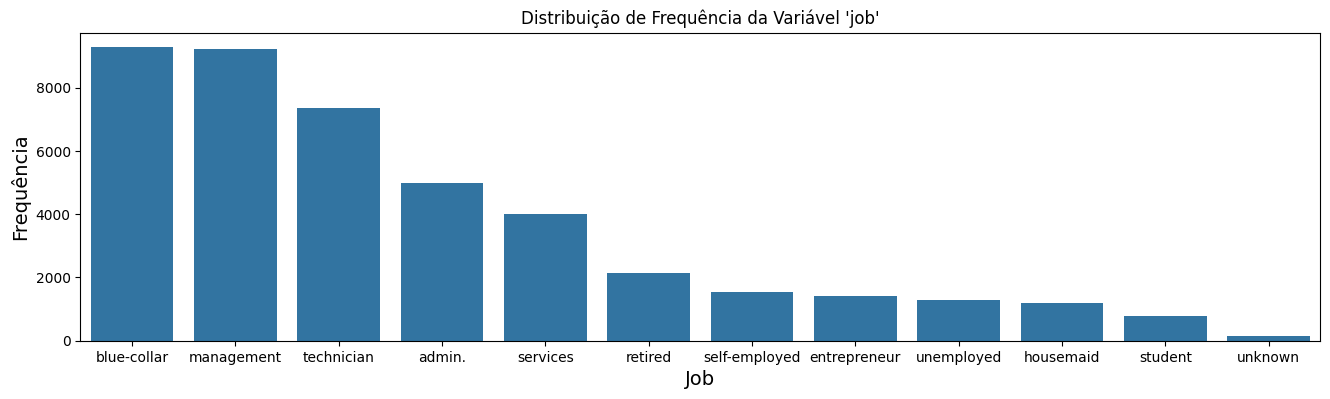

In [ ]:
plt.figure(figsize=(16, 4))
plt.title("Distribuição de Frequência da Variável 'job'")
plt.xlabel("Job", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
sns.barplot(x=freq_abso.index, y=freq_abso.values)
plt.show()

2. Plote um histograma para a variável ‘Age’ com 8 bins (sns.histplot).

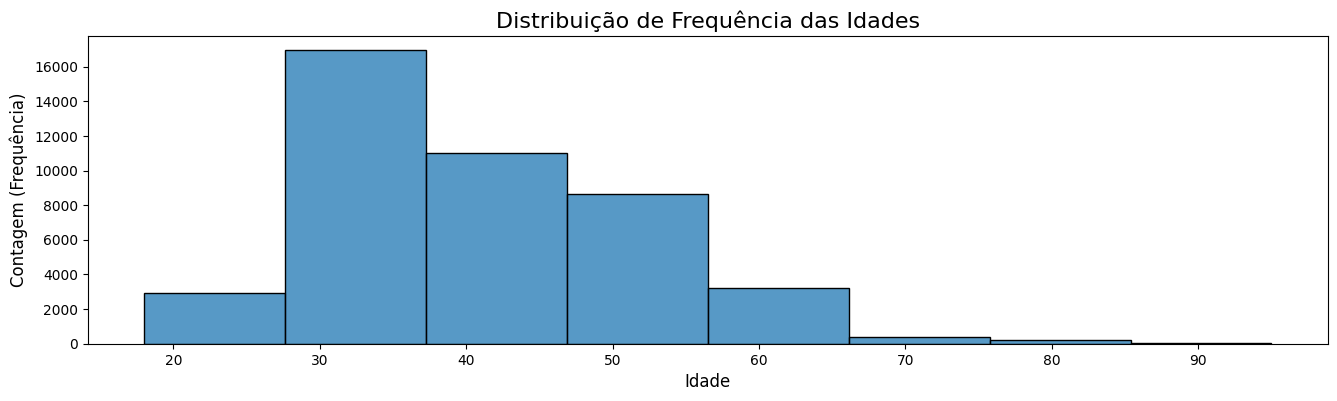

In [ ]:
plt.figure(figsize=(16, 4))
sns.histplot(data=df_teste, x='age', bins=8)
plt.title('Distribuição de Frequência das Idades', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem (Frequência)', fontsize=12)
plt.show()

## Estatística descritiva

1. Obtenha as principais estatísticas descritivas do dataset (describe).

In [ ]:
df_teste.describe()

,age,balance_euros,personal_loan,previous,subscription
count,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000
mean,40.783111,1355.226715,0.164022,0.584260,0.116183
std,10.518987,3039.916830,0.370300,2.329661,0.320448
min,18.000000,-8019.000000,0.000000,0.000000,0.000000
25%,33.000000,71.000000,0.000000,0.000000,0.000000
50%,39.000000,443.000000,0.000000,0.000000,0.000000
75%,48.000000,1415.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,1.000000,275.000000,1.000000


2. Crie um conjunto de boxplots para a variável ‘Age’, um para cada uma das diferentes categorias de ‘Job’ (sns.boxplot).

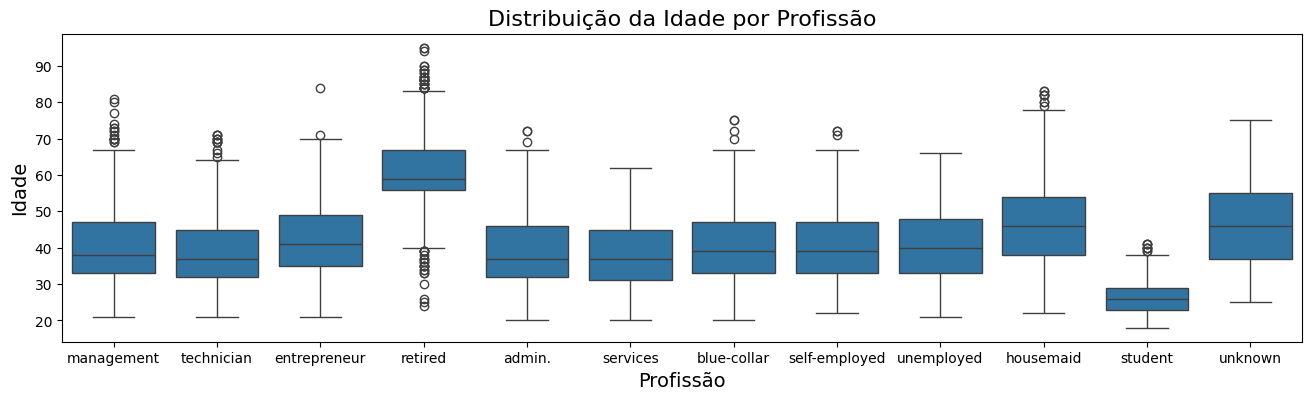

In [ ]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_teste, x='job', y='age')
plt.title('Distribuição da Idade por Profissão', fontsize=16)
plt.xlabel('Profissão', fontsize=14)
plt.ylabel('Idade', fontsize=14)
plt.show()

## Análise bidimensional

1. Obtenha a distribuição conjunta das variáveis ‘Education’ e ‘Marital’. Plote um gráfico com essa distribuição (sns.displot).

In [ ]:
estado_civil = df_teste["marital_status"].unique()
estado_civil

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
escolaridade = df_teste["education"].unique()
escolaridade_ordenado = escolaridade[::-1]
escolaridade_ordenado

array(['primary', 'secondary', 'tertiary'], dtype=object)

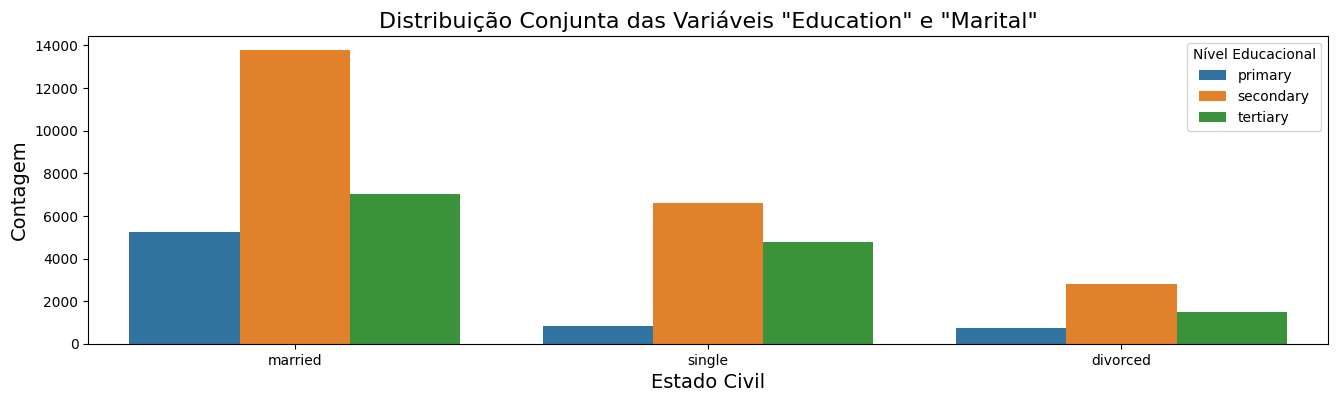

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(
    data=df_teste,
    x='marital_status',
    hue='education',
    hue_order=escolaridade_ordenado
)
plt.title('Distribuição Conjunta das Variáveis "Education" e "Marital"', fontsize=16)
plt.legend(title='Nível Educacional')
plt.xlabel('Estado Civil', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.show()

2. Gere um  gráfico de dispersão para as variáveis ‘Age’ e ‘Balance’ (sns.scatterplot). Use cores para indicar se a pessoa aceitou o depósito a termo ou não.

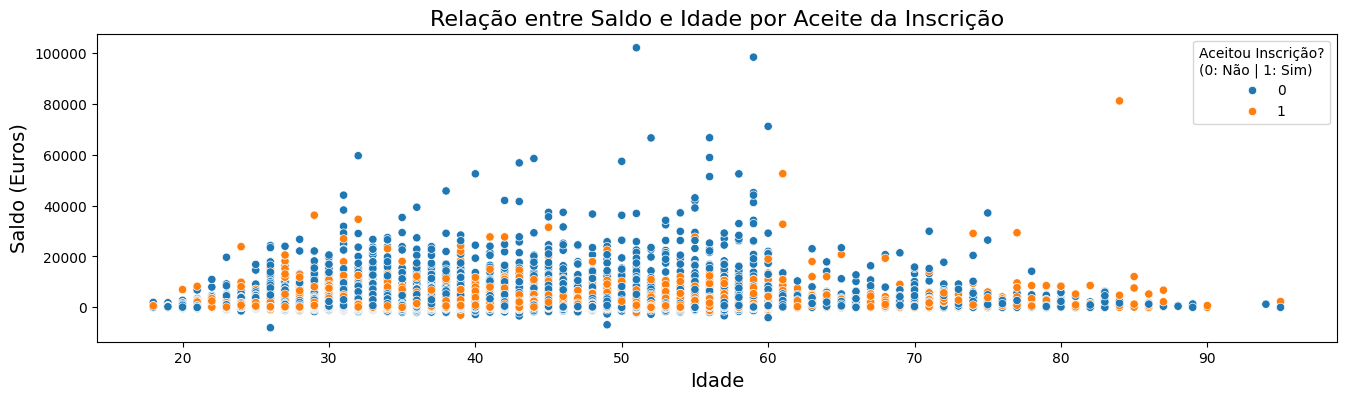

In [ ]:
plt.figure(figsize=(16, 4))

sns.scatterplot(
    data=df_teste,
    x='age',
    y='balance_euros',
    hue='subscription'
)

plt.title('Relação entre Saldo e Idade por Aceite da Inscrição', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Saldo (Euros)', fontsize=14)
plt.legend(title='Aceitou Inscrição?\n(0: Não | 1: Sim)')
plt.show()


3. Calcule a correlação entre as variáveis do dataframe e exiba os resultados em um mapa de calor (sns.heatmap).

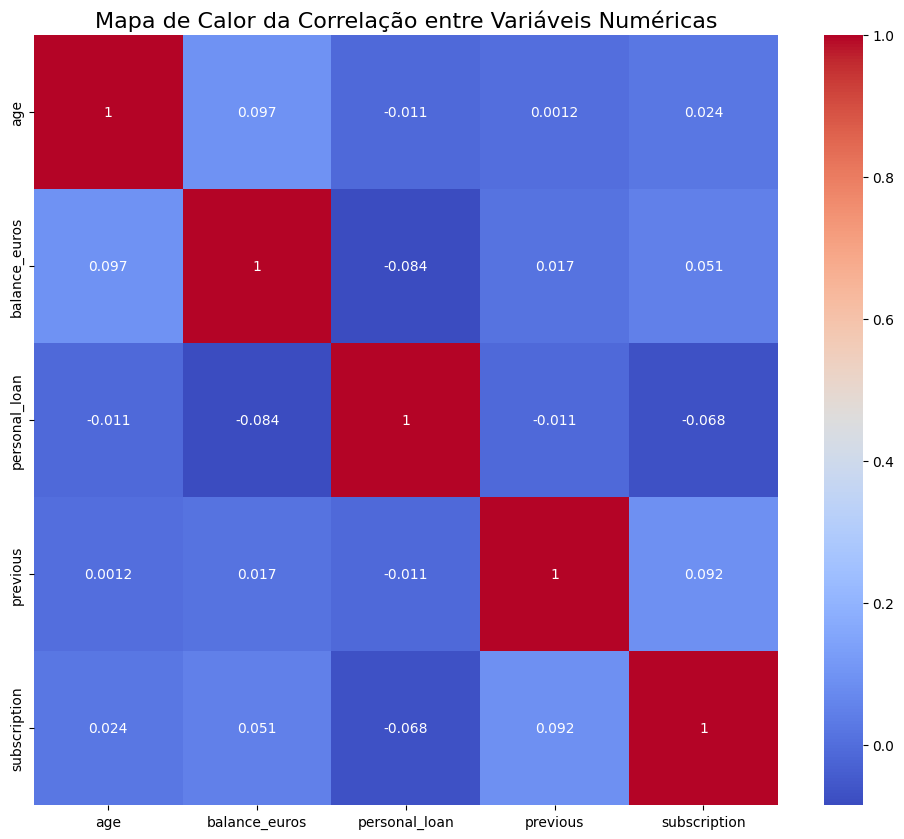

In [ ]:
plt.figure(figsize=(12, 10))

matriz_corr = df_teste.corr(numeric_only=True)
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')

plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()